# topspot

This a package is essentially a set of wrappers around the spotify python api package [spotipy](https://spotipy.readthedocs.io/en/2.12.0/#). topspot faciliates command line scripting with autohotkey, letting me create hotkeys to get spotify search results, control playback, and manage playlist content, etc.

## Utilities (utilities.py)

In [1]:
from topspot import utilities
# Most functions I've written that instatiate a client or user
# spotify object will include the set_env_vars line to make sure 
# that python knows my client_id and other params stored in 
# constants.py

# Get the first track uri returned in search for clipboard
clipboard_uri = utilities.get_clipboard_uri()


Found track_uri: spotify:track:1hz7SRTGUNAtIQ46qiNv2p
Track name: GONE, GONE / THANK YOU
for query: /


## Track tools (track.py)

### Get a DataFrame of the 50 most recently played tracks. 
Can also pass a `track_dicts` list to `track.tracks_df()`as a kwarg. For example, get a `track_dicts` list from `playlist.get_playlist_tracks()`. To get a list of artist_ids for a track at row, use `tracks_df.loc[row, artist_id].split('|')`

In [11]:
from topspot import track

tracks_df = track.tracks_df()
tracks_df.head()

,name,uri,id,artist_name,artist_id,release_date,played_at
0,Blades,spotify:track:5KElyYIMVN77fTzxHBW7xE,5KElyYIMVN77fTzxHBW7xE,Arlo Parks,4kIwETcbpuFgRukE8o7Opx,2023-05-24,2023-06-04 19:57:55.025
1,Pegasus (ft. Phoebe Bridgers),spotify:track:6q00OwNdRcnIwfIHjDaU1D,6q00OwNdRcnIwfIHjDaU1D,Arlo Parks|Phoebe Bridgers,4kIwETcbpuFgRukE8o7Opx|1r1uxoy19fzMxunt3ONAkG,2023-05-24,2023-06-04 19:54:14.745
2,Devotion,spotify:track:6w6gCLDgv4L5AJtVDJNddn,6w6gCLDgv4L5AJtVDJNddn,Arlo Parks,4kIwETcbpuFgRukE8o7Opx,2023-05-24,2023-06-04 19:51:07.407
3,Sometimes… (with Daya & Earthgang),spotify:track:09MduMD14OZjmAxd6u1Qfi,09MduMD14OZjmAxd6u1Qfi,Snakehips|Daya|EARTHGANG,2FwJwEswyIUAljqgjNSHgP|6Dd3NScHWwnW6obMFbl1BH|...,2023-05-05,2023-06-04 19:46:41.812
4,Hell Of A Life,spotify:track:3rCNmRonlHN1TXQLcG3dSk,3rCNmRonlHN1TXQLcG3dSk,Kanye West,5K4W6rqBFWDnAN6FQUkS6x,2010-11-22,2023-06-04 11:34:12.062


## Listening history etc. (database.py)

### Update listening history
Uses SCP to copy file from raspberry pi on LAN to local linux system. Needs to be run from John's WSL, as SCP isn't working on powershell (shocking).

In [2]:
from topspot import database
database.update_track_history()

Found df at: C:\Users\johnp\Dropbox\Projects\topspot\topspot\track_history_df.json
track_history_df updated at 2023-06-04 20:29:41.225660


### Read in listening history
You'll need to copy this file from your wsl path at the same relative `constants.package_path` location to the path defined below

In [60]:
import os
import pandas as pd
from topspot import constants
path = os.path.join(constants.package_path, 'track_history_df.json')
df = pd.read_json(path)

### Plot artist name vs. number of unique song play events for top n artists

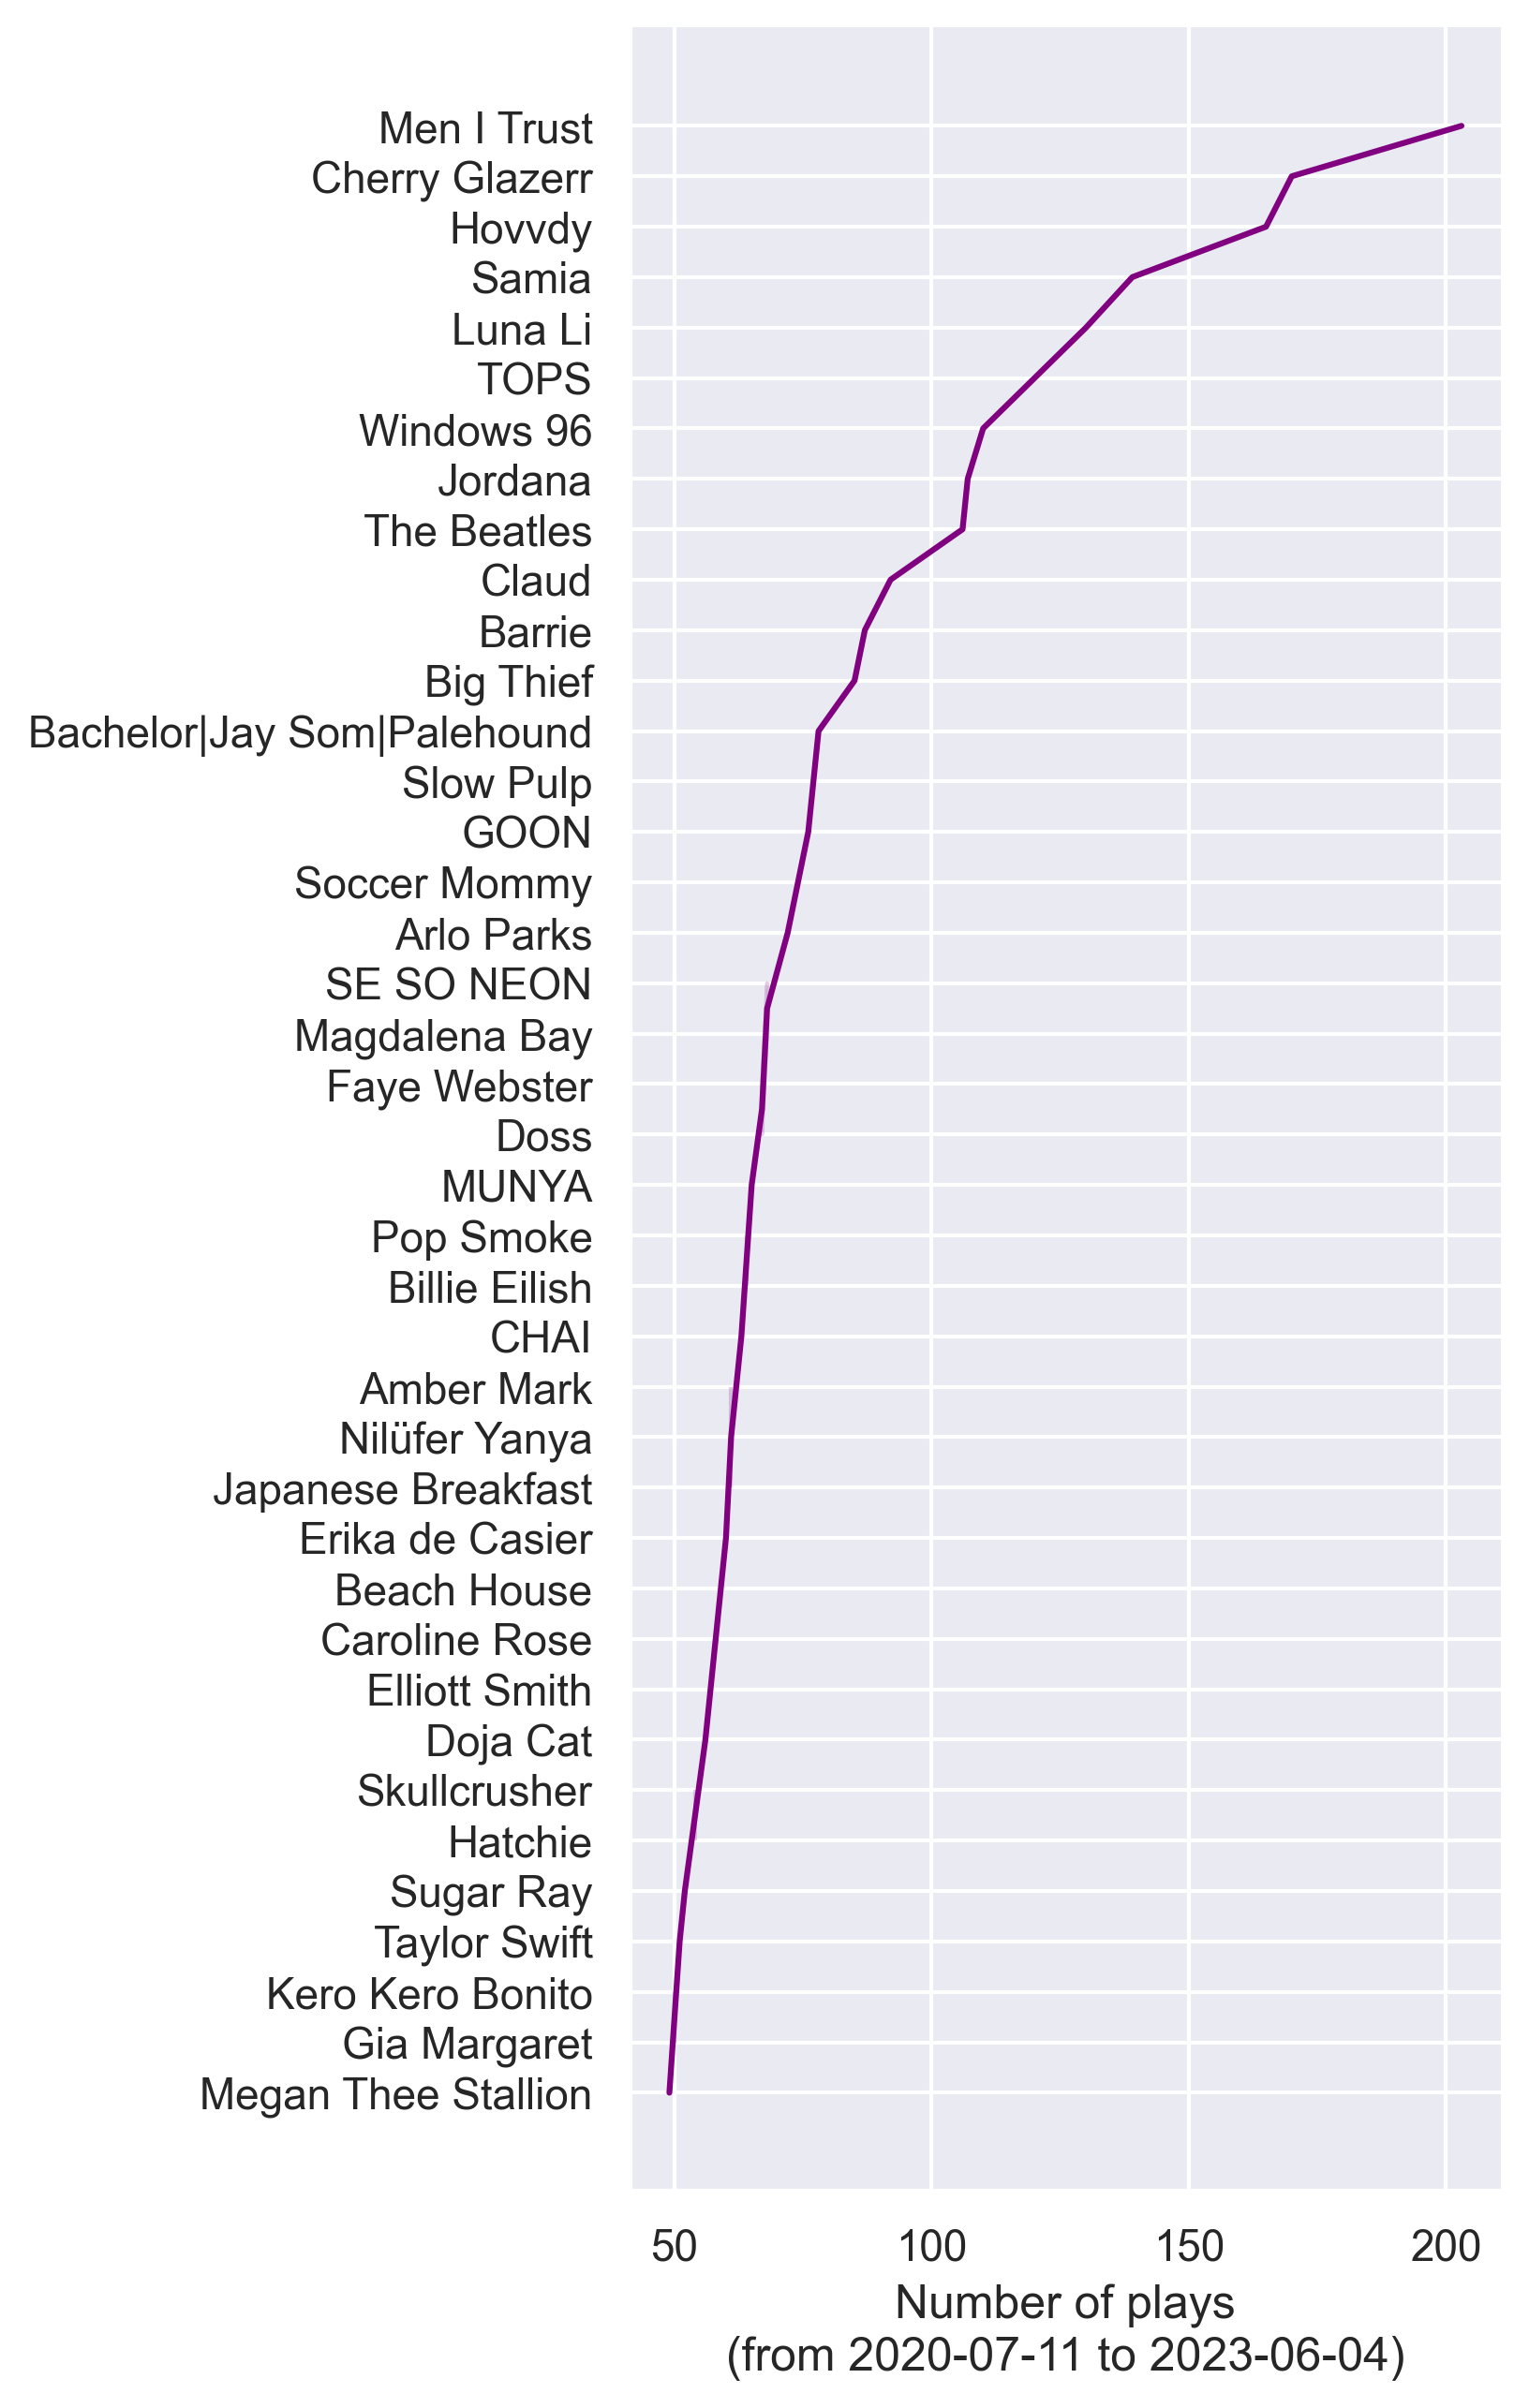

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

width = 4
height = 10
fig = plt.figure(figsize=(width, height))
fig.set_dpi(300)
ax = fig.add_subplot(111)
aggdex = [
    'artist_name'
]
countvar = 'id'
locdex = aggdex + [countvar]
n= 40
table = df.pivot_table(index=aggdex, aggfunc='count').sort_values(by=countvar, ascending=False)
kwargs = {
    'x': countvar,
    'y': aggdex[0],
    'ax': ax,
    'data': table.iloc[0:n],
    'color': 'purple'
}

sns.lineplot(**kwargs)

collect_start = df.played_at.min()
collect_start = str(collect_start)[0:10]
collect_end = str(df.played_at.max())[0:10]
ax.set_xlabel(f'Number of plays\n(from {collect_start} to {collect_end})')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Plot histogram of number of artists with x plays

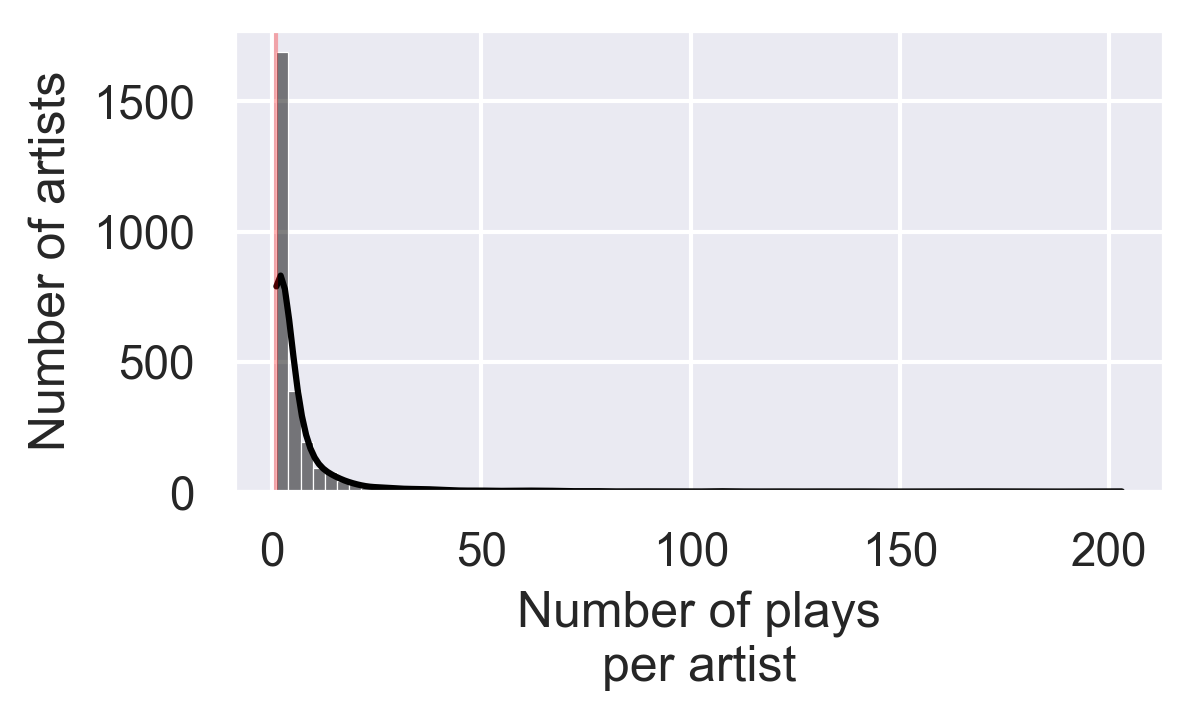

In [71]:
fig = plt.figure(figsize=(4, 2))
fig.set_dpi(300)
ax = fig.add_subplot(111)
sns.histplot(x='played_at', data=table, ax=ax, kde=True, color='black', bins=70)
# ax.hist(table.played_at, density=True)
ax.set_ylabel('Number of artists')
ax.set_xlabel('Number of plays\nper artist')
ax.axvline(1, linewidth=1, color='red', alpha=0.3)

(0.0, 20.0)

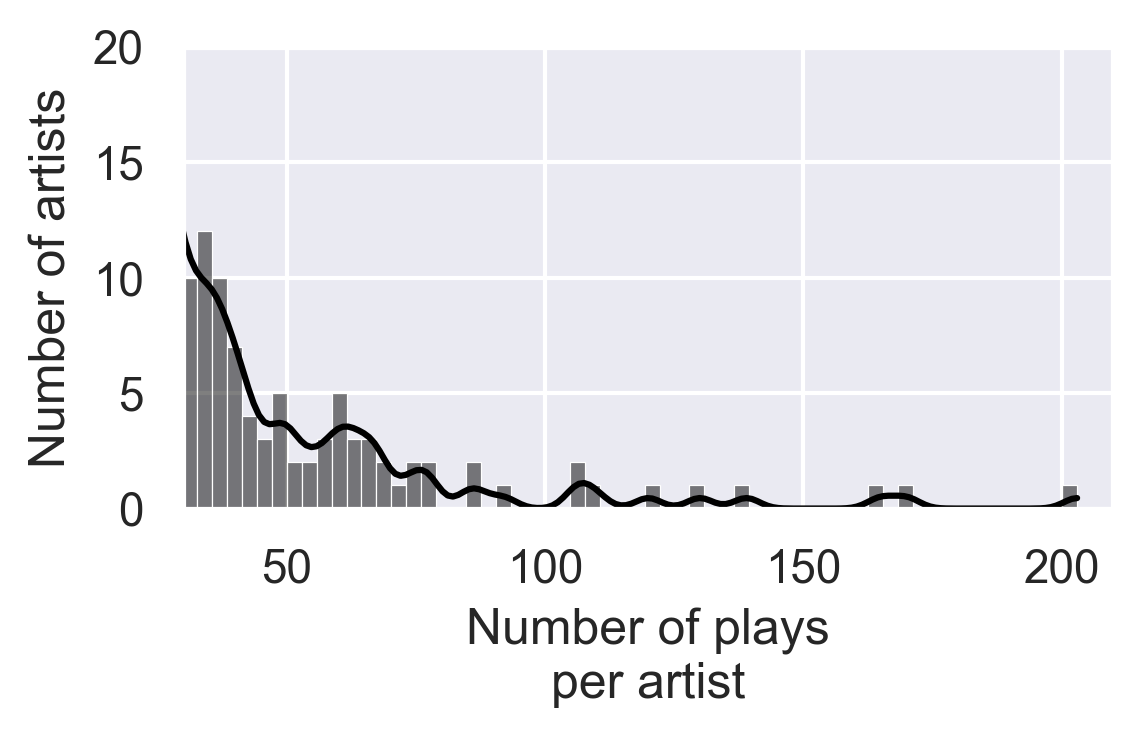

In [78]:
fig = plt.figure(figsize=(4, 2))
fig.set_dpi(300)
ax = fig.add_subplot(111)
sns.histplot(x='played_at', data=table, ax=ax, kde=True, color='black', bins=70)
# ax.hist(table.played_at, density=True)
ax.set_ylabel('Number of artists')
ax.set_xlabel('Number of plays\nper artist')
ax.axvline(1, linewidth=1, color='red', alpha=0.3)
ax.set_xlim(30, 210)
ax.set_ylim(0, 20)

### Playback tools (playback.py)

#### Search spotify for whatever's on the os clipboard and play the first track in results

In [14]:
from topspot import playback

playback.play_clipboard()


Found track_uri: spotify:track:1Ny3j5Z6EMUq5XXDkq3Iaf
Track name: Python
for query: python -m ipykernel install --user --name=env
Playing track


#### Get the currently playing track

In [9]:
from topspot import playback
track = playback.get_current_track()

In [1]:
from topspot import utilities
sp = utilities.get_user_sp()
track = sp.current_playback()

In [5]:
track['item']['duration_ms']

344847

In [12]:
def pseudoskip(fraction=0.001):
    """
    Navigate to the very last 0.1 % of currently
    playing track. If you do this instead of 
    skipping the track, it makes it into recently
    played.
    """
    sp = utilities.get_user_sp()
    current_track = sp.current_playback()
    duration_ms = current_track['item']['duration_ms']
    target_ms = duration_ms - round(duration_ms*fraction)
    sp.seek_track(target_ms)

In [13]:
pseudoskip()

### Playlist tools (playlist.py)

#### Add the currently playing track to the singles playlist for its release month

In [10]:
from topspot import playlist
playlist.add_current_track_to_playlist()

Added Neon Lights by I Break Horses to 2020 May


#### Update playlist database with the 50 user playlists organized at top. 
Adds playlist name, uri, and id. This database can be used to more easily get playlists by name.

In [4]:
from topspot import playlist
db = playlist.DataBase()
db.update_database()

171


In [7]:
# Have a look at the existing database
from topspot import playlist
db = playlist.DataBase()
df = db.get_database_df()
df.head()

,name,uri,id
0,2020 July,spotify:playlist:5ckukg1ucpbnjcy12yJz0h,5ckukg1ucpbnjcy12yJz0h
1,2020 June,spotify:playlist:3wWYRsL7ucIMjluE37PAUg,3wWYRsL7ucIMjluE37PAUg
2,2020 May,spotify:playlist:0j95LGQzCSJUumv4CIjRip,0j95LGQzCSJUumv4CIjRip
3,2020 April,spotify:playlist:5x1aMHhAXDLDvd0VZw8Nyk,5x1aMHhAXDLDvd0VZw8Nyk
4,2020 March,spotify:playlist:4WTtDhpmx6BtFq9tn1EgSs,4WTtDhpmx6BtFq9tn1EgSs


#### Get user playlist by name

In [13]:
from topspot import playlist
# Look up the playlist
pl = playlist.get_playlist_by_name(playlist_name='2020 May')
# Find the first track on the playlist, print its
# name and artist.
first_track = pl['tracks']['items'][0]['track']
print(f"First track of playlist: {first_track['name']} by {first_track['artists'][0]['name']}")

First track of playlist: Saved My Life by Sia


#### Create a new playlist and add it to `playlist.database()`

In [14]:
from topspot import playlist
playlist.new_playlist(public=True)

True

#### Make a dataframe of all tracks (up to length 100, limited by spotify api) on a playlist. Playlist gotten by ID

If you don't pass a playlist_id it'll just default to one of my singles playlists

In [16]:
from topspot import playlist

pl_tracks_df = playlist.make_playlist_tracks_df(playlist_id="78twiJHUxmr1JcmCI943fn")
pl_tracks_df.head()

,name,uri,id,artist_name,artist_id,release_date
0,Throwing Stones,spotify:track:7mefpx8BrcYNpl7nV5Jr6h,7mefpx8BrcYNpl7nV5Jr6h,Ardyn,4Ibjhh0sibd5FrMcot5aOu,2017-08-17
1,Better,spotify:track:7iCbeEbIEFbCP559GvoyYL,7iCbeEbIEFbCP559GvoyYL,Mallrat,4OSArit7O2Jaj4mgf3YN7A,2017-10-13
2,2 Cool 2 Care,spotify:track:7678cIG4ozfGo5CnVG3YwH,7678cIG4ozfGo5CnVG3YwH,Anna Burch,26OB2jqYqL7pNslVtu4VGt,2017-10-12
3,I Miss That Feeling,spotify:track:42XZcWNSbZCPQarEodiHbi,42XZcWNSbZCPQarEodiHbi,Tennis,1ybAN3utgdoUL1MUCtH4QM,2017-10-06
4,drink i'm sippin on,spotify:track:5DmCLnojsZpi5SH2MMBDOW,5DmCLnojsZpi5SH2MMBDOW,Yaeji,2RqrWplViWHSGLzlhmDcbt,2017-10-02


#### Make a list of all the track dictionaries in a playlist (gotten by name). Again, only up to 100 tracks

If you don't pass a playlist_id it'll just default to one of my singles playlists

In [17]:
from topspot import playlist
db = playlist.database()
track_list = playlist.get_playlist_tracks(playlist_id=db.set_index('name').loc['2020 June', 'id'])

Illustrative check to see whether all tracks in singles playlist are actually singles

In [18]:
total = len(track_list)
singles = []
for track in track_list:
    atype = track['album']['album_type']
    if atype == 'single':
        singles.append(track)
    else:
        pass
    
if total == len(singles):
    print("All tracks are singles")

All tracks are singles


#### Make a playlist with all the singles released from artists of interest in the last 100 days

In [19]:
from topspot import playlist
from importlib import reload
reload(playlist)
playlist.update_singles_playlists(n_artists=3, time_window=100)

### Artist tools (artist.py)

#### Create a dataframe of the 20 latest albums of type single from an artist

In [20]:
from topspot import artist
from importlib import reload
reload(artist)
singles_df = artist.singles_df(artist_name='Migos')
singles_df.head()

Compiled singles DataFrame for Migos


,artist_name,artist_id,album_title,album_id,explicit_tracks,release_date,album_uri
0,Migos,6oMuImdp5ZcFhWP0ESe6mG,Need It,3L3WBqghAN3LeGZa5eRIBk,True,2020-05-22,spotify:album:3L3WBqghAN3LeGZa5eRIBk
1,Migos,6oMuImdp5ZcFhWP0ESe6mG,Racks 2 Skinny,3PASWLvNfvfMF68dDznEgK,True,2020-05-11,spotify:album:3PASWLvNfvfMF68dDznEgK
2,Migos,6oMuImdp5ZcFhWP0ESe6mG,Taco Tuesday,42SNLQYdeiybSNLIxVA2yn,True,2020-05-05,spotify:album:42SNLQYdeiybSNLIxVA2yn
3,Migos,6oMuImdp5ZcFhWP0ESe6mG,Give No Fxk,5PGZpfzDkbbTvhDAuZlSQo,True,2020-02-14,spotify:album:5PGZpfzDkbbTvhDAuZlSQo
4,Migos,6oMuImdp5ZcFhWP0ESe6mG,Frosted Flakes,3UXeJSdcjjv1rzRztFhiL4,True,2019-08-14,spotify:album:3UXeJSdcjjv1rzRztFhiL4


#### Create a dataframe containing the 20 most recent singles for every first artist featured in playlist.dataframe()

In [21]:
from topspot import artist
df = artist.all_artists_singles_df()
df.head()

Compiled singles DataFrame for Lady Gaga
Compiled singles DataFrame for Kamaiyah


,artist_name,artist_id,album_title,album_id,explicit_tracks,release_date,album_uri
0,Lady Gaga,1HY2Jd0NmPuamShAr6KMms,Sour Candy (with BLACKPINK),6y6lP1WRfqEhv8RLy4ufZB,False,2020-05-28,spotify:album:6y6lP1WRfqEhv8RLy4ufZB
1,Lady Gaga,1HY2Jd0NmPuamShAr6KMms,Rain On Me (with Ariana Grande),4TqgXMSSTwP3RCo3MMSR6t,False,2020-05-22,spotify:album:4TqgXMSSTwP3RCo3MMSR6t
2,Lady Gaga,1HY2Jd0NmPuamShAr6KMms,Stupid Love (Vitaclub Warehouse Mix),4WzXApqZ4kE30TDjH1bKQi,False,2020-05-15,spotify:album:4WzXApqZ4kE30TDjH1bKQi
3,Lady Gaga,1HY2Jd0NmPuamShAr6KMms,Stupid Love,2HDW1EX8IBI3jqobswAfrZ,False,2020-02-28,spotify:album:2HDW1EX8IBI3jqobswAfrZ
4,Lady Gaga,1HY2Jd0NmPuamShAr6KMms,Your Song,7hdQxJEgGZX4d92LKEhyt3,False,2018-03-30,spotify:album:7hdQxJEgGZX4d92LKEhyt3


### Modify playlist.add_track_to_playlist() so that it checks whether playlist length == 100. If so start a new playlist (original_playlist B or something).

### Need to add controls for seeking in track. Will replace shift + left/right arrow to seek in track, which currently requires spotify to be the active window. 

### Integration with feedly api